In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from scipy.spatial.distance import *
from scipy.cluster.hierarchy import dendrogram, linkage , set_link_color_palette
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('PesquisaBinaria.csv',header=0,index_col=0)

In [5]:
#Assurence that there is no missing values on the dateset
for col in df.columns.values: 
    assert not df[col].isnull().values.any()

In [6]:
df.head(3)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q42,q43,q44,q45,q46,q47,q48,q49,q50,setor
1,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,1,1,0,...,1,0,1,1,1,0,1,0,1,2
3,0,1,0,1,0,1,0,1,1,0,...,1,0,1,0,0,0,1,0,1,2


In [7]:
header_row = df.columns.values

In [8]:
for col in header_row:
    print(col)
    print(df[col].value_counts().sort_index())

q1
0    25
1    10
Name: q1, dtype: int64
q2
0    20
1    15
Name: q2, dtype: int64
q3
0    26
1     9
Name: q3, dtype: int64
q4
0    22
1    13
Name: q4, dtype: int64
q5
0    24
1    11
Name: q5, dtype: int64
q6
0    18
1    17
Name: q6, dtype: int64
q7
0    22
1    13
Name: q7, dtype: int64
q8
0    25
1    10
Name: q8, dtype: int64
q9
0    19
1    16
Name: q9, dtype: int64
q10
0    20
1    15
Name: q10, dtype: int64
q11
0    25
1    10
Name: q11, dtype: int64
q12
0    23
1    12
Name: q12, dtype: int64
q13
0    15
1    20
Name: q13, dtype: int64
q14
0    19
1    16
Name: q14, dtype: int64
q15
0    23
1    12
Name: q15, dtype: int64
q16
0    14
1    21
Name: q16, dtype: int64
q17
0    29
1     6
Name: q17, dtype: int64
q18
0    16
1    19
Name: q18, dtype: int64
q19
0    26
1     9
Name: q19, dtype: int64
q20
0    21
1    14
Name: q20, dtype: int64
q21
0    30
1     5
Name: q21, dtype: int64
q22
0    26
1     9
Name: q22, dtype: int64
q23
0    25
1    10
Name: q23, dtype: int64
q24
0 

In [9]:
#removing the setor column
df_clean = df.drop(columns=['setor'])

In [10]:
# calculating Simple Matching Coefficient dissimilarity using python (HAD TO CREATE THIS ONE BY HAND)
def dissimilarity(X):
    X = np.mat(X)
    Y = np.mat(X)
    N1, N = np.shape(X)
    simlaridade = ((X*Y.T)+((1-X)*(1-Y).T))/N
    d=(np.sqrt(1-simlaridade))
    return d
DISTANCIA_SMC = pd.DataFrame(dissimilarity(df_clean))
DISTANCIA_SMC.fillna(0, inplace=True)
DISTANCIA_SMC

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.000000,0.812404,0.748331,0.707107,0.663325,0.894427,0.721110,0.663325,0.509902,0.469042,...,0.800000,0.583095,0.707107,0.692820,0.812404,0.800000,0.707107,0.836660,0.734847,0.547723
1,0.812404,0.000000,0.469042,0.721110,0.761577,0.509902,0.707107,0.761577,0.663325,0.692820,...,0.547723,0.565685,0.721110,0.734847,0.447214,0.509902,0.748331,0.447214,0.748331,0.692820
2,0.748331,0.469042,0.000000,0.648074,0.692820,0.529150,0.600000,0.692820,0.616441,0.678233,...,0.489898,0.583095,0.648074,0.663325,0.424264,0.447214,0.616441,0.469042,0.648074,0.678233
3,0.707107,0.721110,0.648074,0.000000,0.424264,0.678233,0.583095,0.469042,0.692820,0.774597,...,0.707107,0.748331,0.565685,0.509902,0.748331,0.678233,0.489898,0.748331,0.565685,0.692820
4,0.663325,0.761577,0.692820,0.424264,0.000000,0.692820,0.600000,0.529150,0.707107,0.761577,...,0.748331,0.761577,0.509902,0.529150,0.761577,0.692820,0.547723,0.761577,0.616441,0.678233
5,0.894427,0.509902,0.529150,0.678233,0.692820,0.000000,0.632456,0.721110,0.761577,0.836660,...,0.529150,0.734847,0.678233,0.721110,0.424264,0.489898,0.678233,0.424264,0.678233,0.761577
6,0.721110,0.707107,0.600000,0.583095,0.600000,0.632456,0.000000,0.565685,0.761577,0.761577,...,0.663325,0.734847,0.509902,0.565685,0.648074,0.632456,0.469042,0.678233,0.509902,0.678233
7,0.663325,0.761577,0.692820,0.469042,0.529150,0.721110,0.565685,0.000000,0.707107,0.707107,...,0.692820,0.761577,0.547723,0.529150,0.734847,0.721110,0.509902,0.734847,0.583095,0.678233
8,0.509902,0.663325,0.616441,0.692820,0.707107,0.761577,0.761577,0.707107,0.000000,0.489898,...,0.678233,0.447214,0.774597,0.707107,0.663325,0.678233,0.721110,0.692820,0.748331,0.565685
9,0.469042,0.692820,0.678233,0.774597,0.761577,0.836660,0.761577,0.707107,0.489898,0.000000,...,0.707107,0.489898,0.748331,0.734847,0.721110,0.734847,0.748331,0.721110,0.774597,0.565685


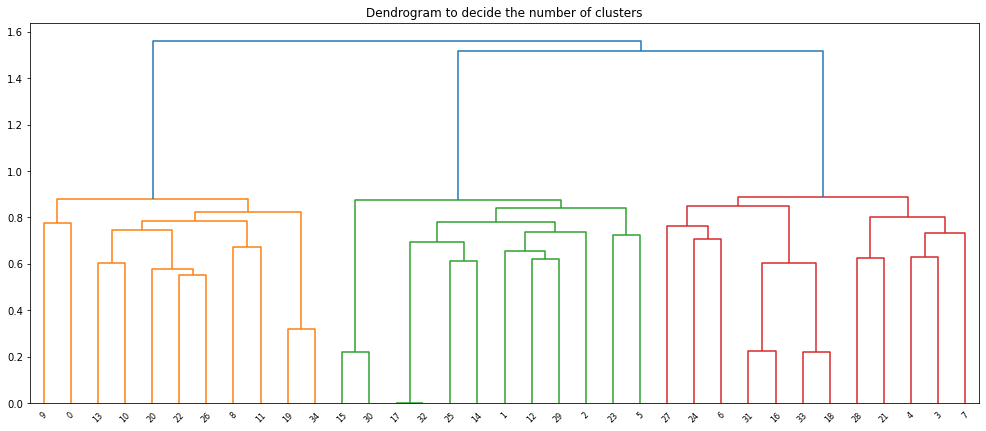

In [11]:
plt.figure(figsize=(17, 7))  
plt.title("Dendrogram to decide the number of clusters")  
dend = dendrogram(linkage(DISTANCIA_SMC, method='average',optimal_ordering=True))

In [12]:
cluster_H = AgglomerativeClustering(affinity='precomputed',linkage='average',compute_distances=True,n_clusters=3)
df_clean['cluster_H'] = cluster_H.fit_predict(DISTANCIA_SMC)

In [13]:
cluster_H.distances_

array([0.        , 0.14142136, 0.14142136, 0.14142136, 0.2       ,
       0.34580346, 0.34641016, 0.37416574, 0.37416574, 0.37416574,
       0.38277716, 0.4       , 0.4       , 0.42332641, 0.42426407,
       0.4472136 , 0.4472136 , 0.45025865, 0.45601599, 0.45812759,
       0.45869981, 0.46904158, 0.47931269, 0.4831198 , 0.4850306 ,
       0.49909592, 0.49982906, 0.50544152, 0.50990195, 0.52015507,
       0.52112804, 0.54379936, 0.69652216, 0.71607597])

In [14]:
df['cluster_H'] = df_clean['cluster_H']

In [15]:
df[['setor','cluster_H']]

,setor,cluster_H
1,1,1
2,2,2
3,2,2
4,3,0
5,3,0
6,2,2
7,3,0
8,3,0
9,1,1
10,1,1
